# 10.1 Theorie Regression 

In der Analyse technischer und physikalischer Daten ist die Methode der
Regression ein fundamentales Werkzeug. Einfach ausgedrückt, ist die Regression
ein statistisches Verfahren, das den Zusammenhang zwischen Variablen ermittelt.
In diesem Kapitel beschäftigen wir uns zunächst mit der Theorie von
Regressionsverfahren.

## Lernziele

```{admonition} Lernziele
:class: admonition-goals
* Sie wissen, was **Regression** ist.
* Sie wissen, was das **Bestimmtheitsmaß** $R^2$ ist und können es für **lineare Regression** interpretieren:
  * Wenn $R^2 = 1$  ist, dann gibt es den perfekten linearen Zusammenhang und die
    Modellfunktion ist eine sehr gute Anpassung an die Messdaten.
  * Wenn $R^2 = 0$ oder gar negativ ist, dann funktioniert die lineare
    Modellfunktion überhaupt nicht.
```

## Regression kommt aus der Statistik

In der Statistik beschäftigen sich Mathematikerinnen und Mathematiker bereits
seit Jahrhunderten damit, Analyseverfahren zu entwickeln, mit denen
experimentelle Daten gut erklärt werden können. Falls wir eine “erklärende”
Variable haben und wir versuchen, die Abhängigkeit einer Messgröße von der
erklärenden Variable zu beschreiben, nennen wir das Regressionsanalyse oder kurz
**Regression**. Bei vielen Problemen suchen wir nach einem linearen Zusammenhang
und sprechen daher von **linearer Regression**. Mehr Details finden Sie auch bei
[Wikipedia → Regressionsanalyse](https://de.wikipedia.org/wiki/Regressionsanalyse).

Etwas präziser formuliert ist lineare Regression ein Verfahren, bei dem es eine
Einflussgröße $x$ und eine Zielgröße $y$ mit $N$ Paaren von dazugehörigen
Messwerten $(x^{(1)},y^{(1)})$, $(x^{(2)},y^{(2)})$, $\ldots$,
$(x^{(N)},y^{(N)})$ gibt. Dann sollen zwei Parameter $m$ und $b$ geschätzt
werden, so dass möglichst für alle Datenpunkte $(x^{(i)}, y^{(i)})$ die lineare
Gleichung $y^{(i)} = m\cdot x^{(i)}+ b$ gilt. Geometrisch ausgedrückt: durch die
Daten soll eine Gerade gelegt werden. Da bei den Messungen auch Messfehler
auftreten, werden wir die Gerade nicht perfekt treffen, sondern kleine Fehler
machen, die wir hier mit $\varepsilon^{(i)}$ bezeichnen. Wir suchen also die
beiden Parameter $m$ und $b$, so dass  

$$y^{(i)} =  m \cdot x^{(i)} + b + \varepsilon^{(i)}.$$

Die folgende Grafik veranschaulicht das lineare Regressionsmodell. Die Paare von
Daten sind in blau gezeichnet, das lineare Regressionsmodell in rot.

```{figure} pics/Linear_regression.svg
---
name: fig_linear_regression
---
Lineare Regression: die erklärende Variable (= Input oder unabhängige Variable oder Ursache) ist auf der x-Achse, die
abhängige Variable (= Output oder Wirkung) ist auf der y-Achse aufgetragen, Paare von Messungen sind in blau
gekennzeichnet, das Modell in rot.

([Quelle:](https://en.wikipedia.org/wiki/Linear_regression#/media/File:Linear_regression.svg) "Example of simple linear regression, which has one independent variable" von Sewaqu. Lizenz: Public domain))
```

Zu einer Regressionsanalyse gehört mehr als nur die Regressionskoeffizienten zu
bestimmen. Daten müssen vorverarbeitet werden, unter mehreren unabhängigen
Variablen (Inputs) müssen diejenigen ausgewählt werden, die tatsächlich die
Wirkung erklären. Das lineare Regressionsmodell muss gefittet werden, d.h. die
Parameter geschätzt werden und natürlich muss das Modell dann auch getestet
werden. Bei den meisten Regressionsmodellen gibt es noch Modellparameter, die
feinjustiert werden können und die Prognosefähigkeit verbessern.

Im Folgenden erkunden wir einen realistischen Datensatz, um daran zu erklären,
wie lineare Regression funktioniert.

## Beispiel: weltweiter CO2-Ausstoß

Wir betrachten den weltweiten CO2-Ausstoß bis 2020 in metrischen Tonnen pro
Einwohner ([hier Download](https://nextcloud.frankfurt-university.de/s/3wd24yXeEoTEwRz)).

In [1]:
import pandas as pd

data = pd.read_csv('data/co2_emissionen_worldwide.csv', skiprows=1, index_col=0)
data.head()

,Metrische_Tonnen_pro_Einwohner
Jahr,
1990,3.902952
1991,3.874590
1992,3.804011
1993,3.769328
1994,3.732385


Wir verschaffen uns mit den Funktionen `info()` und `describe()` einen Überblick
über den Datensatz. Wie üblich benutzen wir `info()` zuerst.

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Metrische_Tonnen_pro_Einwohner  29 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes
None


Offensichtlich enthält der Datensatz 29 Zeilen (= Jahre) mit gültigen Einträgen
zu den metrischen Tonnen CO2-Ausstoß pro Einwohner. Die statistischen Kennzahlen
sind:

In [3]:
print(data.describe())

       Metrische_Tonnen_pro_Einwohner
count                       29.000000
mean                         4.126993
std                          0.324550
min                          3.732385
25%                          3.812655
50%                          4.092267
75%                          4.435536
max                          4.606487


Nun folgt noch die Visualisierung der Daten.

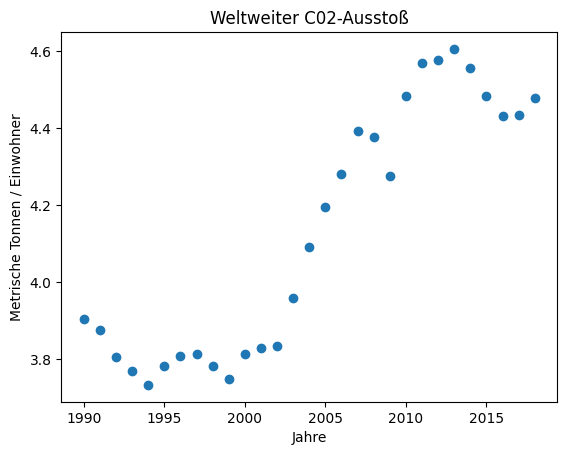

In [4]:
import matplotlib.pyplot as plt

jahre = data.index
co2 = data.loc[:, 'Metrische_Tonnen_pro_Einwohner']

plt.figure()
plt.scatter(jahre, co2)
plt.xlabel('Jahre')
plt.ylabel('Metrische Tonnen / Einwohner')
plt.title('Weltweiter C02-Ausstoß');

Fangen wir mit dem einfachsten Modell an, diese Messdaten zu beschreiben, mit
einer linearen Funktion. Die “erklärende” Variable ist in dem Beispiel das Jahr.
Wir versuchen, die Abhängigkeit einer Messgröße (hier die CO2-Emissionen pro
Einwohner) von der erklärenden Variable als lineare Funktion zu beschreiben.

```{admonition} Mini-Übung
:class: miniexercise
Denken Sie sich Werte für die Steigung m und den y-Achsenabschnitt b einer
linearen Funktion aus. Erzeugen Sie einen Vektor mit 100 x-Werten von 1990 bis
2018 und einen Vektor y mit $y = mx + b$. Lassen Sie diese lineare Funktion als
durchgezogene rote Linie in den gleichen Plot wie die gepunkteten Messwerte
zeichnen. Welche Werte für $m$ und $b$ müssen Sie wählen, damit die rote Linie
passend zu den blauen Punkten ist? Spielen Sie mit $m$ und $b$ herum, bis es
passen könnte.

Tipp: `linspace(start, stopp, anzahl)` aus dem NumPy-Modul generiert `anzahl`
Werte von `start` bis `stopp`. 
```

In [5]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
import numpy as np

x_modell = np.linspace(1990, 2018, 100)

m = 0.0344
b = -64.7516
y_modell = m * x_modell + b

plt.figure()
plt.scatter(jahre,co2)
plt.plot(x_modell, y_modell, color='red')
plt.xlabel('Jahr') 
plt.ylabel('Metrische Tonnen pro Einwohner')
plt.title('Weltweiter CO2-Ausstoß von 1990 bis 2018'); 
```
````

Wenn wir jetzt eine Prognose für das Jahr 2030 wagen wollen, können wir den Wert
in die lineare Funktion einsetzen und erhalten für 2030 einen CO2-Ausstoß von
5.1 metrischen Tonnen pro Einwohner :-(

## Das Bestimmheitsmaß R²

Woher wissen wir eigentlich, dass diese Steigung $m$ und dieser
y-Achsenabschnitt $b$ am besten passen? Dazu berechnen wir, wie weit weg die
Gerade von den Messpunkten ist. Wie das geht, veranschaulichen wir uns mit der
folgenden Grafik.

```{figure} pics/fig10_regression.png
---
name: fig10_regression
---
Messpunkte (blau) und der Abstand (grün) zu einer Modellfunktion (rot)

([Quelle:](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate#/media/Datei:MDKQ1.svg) Autor: Christian Schirm, Lizenz: CC0)
```

Die rote Modellfunktion trifft die Messpunkte mal mehr und mal weniger gut. Wir
können jetzt für jeden Messpunkt berechnen, wie weit die rote Kurve von ihm weg
ist (= grüne Strecke), indem wir die Differenz der y-Koordinaten errechnen: 

$$r = y_{\text{blau}}-y_{\text{rot}}.$$ 

Diese Differenz nennt man **Residuum**. Danach summieren wir die Fehler (also
die Residuen) auf und erhalten den Gesamtfehler. Leider kann es dabei passieren,
dass am Ende als Gesamtfehler 0 herauskommt, weil beispielsweise für den 1.
Messpunkt die blaue y-Koordinate unter der roten y-Koordinate liegt und damit
ein negatives Residuum herauskommt, aber für den 5. Messpunkt ein positives
Residuum. Daher quadrieren wir die Residuen. Und damit nicht der Gesamtfehler
größer wird nur, weil wir mehr Messpunkte dazunehmen, teilen wir noch durch die
Anzahl der Messpunkte $N$. Mathematisch formuliert haben wir

$$\frac{1}{N}\sum_{i=1}^{N} (y^{(i)} - f(x^{(i)})^2. $$

Wir berechnen die Fehlerquadratsumme in Python mit der `sum()` Funktion aus
NumPy. Insgesamt ergibt sich

In [6]:
import numpy as np

# blaue y-Koordinaten = Messpunkte
y_blau = co2

# Berechnung der roten y-Koordinaten, indem wir x-Koordinaten der Messpunkte
# in die Modellfunktion y = m*x + b einsetzen
x = jahre
y_rot = 0.0344 * x - 64.7516

# Berechnung Gesamtfehler
N = 29
gesamtfehler = 1/N * np.sum( (y_blau - y_rot)**2 )

print(f'Der Gesamtfehler ist {gesamtfehler}.')

Der Gesamtfehler ist 0.02248906646562731.


Ist das jetzt groß oder klein? Liegt eine gute Modellfunktion vor, die die Daten
gut nähert oder nicht? Um das zu beurteilen, berechnen wir, wie groß der Fehler
wäre, wenn wir nicht die roten y-Koordinaten der Modellfunktion in die
Fehlerformel einsetzen würden, sondern einfach nur den Mittelwert als
Schätzwert, also

$$\bar{y} = \frac{1}{N} \sum_{i=1}^{N} y^{(i)}.$$

In Python ergibt sich der folgende Code:

In [7]:
y_mittelwert = y_blau.mean()
gesamtfehler_mittelwert = 1/N * np.sum( (y_blau - y_mittelwert)**2 )

print(f'Der Gesamtfehler für den Mittelwert als Schätzung ist {gesamtfehler_mittelwert}.')

Der Gesamtfehler für den Mittelwert als Schätzung ist 0.10170059696116414.


Offensichtlich ist der Gesamtfehler für die Modellfunktion kleiner als wenn wir
einfach nur immer den Mittelwert prognostizieren würden. Wir rechnen das in
Prozent um:

In [8]:
relativer_fehler = gesamtfehler / gesamtfehler_mittelwert

print(f'Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: {relativer_fehler:.4f}')
print(f'In Prozent umgerechnet ist das: {relativer_fehler * 100:.2f} %.')

Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: 0.2211
In Prozent umgerechnet ist das: 22.11 %.


In der Statistik wurde diese Verhältnis (Gesamtfehler geteilt durch Gesamtfehler
Mittelwert) als Qualitätkriterium für ein lineares Regressionsproblem
festgelegt. Genaugenommen, rechnet man 1 - Gesamtfehler /  (Gesamtfehler
Mittelwert) und nennt diese Zahl **Bestimmtheitsmaß $R^2$**. Details finden Sie
bei [Wikipedia
(Bestimmtheitsmaß)](https://de.wikipedia.org/wiki/Bestimmtheitsmaß). Die Formel
lautet:

$$R^2 = 1 - \frac{\sum_{i=1}^N (y_i - f(x_i))^2}{\sum_{i=1}^N(y_i-\bar{y})}. $$

Dabei kürzt sich das $\frac{1}{N}$ im Zähler und Nenner weg. Nachdem der
$R^2$-Wert ausgerechnet wurde, können wir nun die Qualität der Anpassung
beurteilen:

* Wenn $R^2 = 1$  ist, dann gibt es den perfekten linearen Zusammenhang und die
  Modellfunktion ist eine sehr gute Anpassung an die Messdaten.
* Wenn $R^2 = 0$ oder gar negativ ist, dann funktioniert die lineare
  Modellfunktion überhaupt nicht.

Für das Beispiel ergibt sich ein Bestimmtheitsmaß $R^2$ von

In [9]:
R2 = 1 - relativer_fehler
print(f'R2 = {R2:.2f}')

R2 = 0.78


Die lineare Regressionsgerade erklärt die CO2-Messwerte ganz gut, aber eben
nicht perfekt.

## Interaktive Visualisierung R²-Score

Auf der Seite [https://mathweb.de](https://mathweb.de) finden Sie eine Reihe von
Aufgaben und interaktiven Demonstrationen rund um die Mathematik. Insbesondere
gibt es dort auch eine interaktive Demonstration des R²-Scores.

Drücken Sie auf den zwei kreisförmigen Pfeile rechts oben. Dadurch wird ein
neuer Datensatz erzeugt. Die Messdaten sind durch grüne Punkte dargestellt, das
lineare Regressionsmodell durch eine blaue Gerade. Im Titel wird der aktuelle
und der optimale R²-Wert angezeigt. Ziehen Sie an den weißen Punkten, um die
Gerade zu verändern. Schaffen Sie es, den optimalen R²-Score zu treffen?
Beobachten Sie dabei, wie die Fehler (rot) kleiner werden.

<iframe width="560" height="315" src="https://lti.mint-web.de/examples/index.php?id=01010320"  allowfullscreen></iframe>